# Document d'analyse de la presse

### Chargement des bibliothèques et fonctions

In [1]:
import pandas as pd

## Chargement des données

chargement, mise en forme et renommage

In [30]:
#data = pd.read_excel("./Grille de codage - revue de presse écrite 2020.xlsx")

url = "https://github.com/emilienschultz/Documents_temporaires/raw/master/Grille%20de%20codage%20-%20revue%20de%20presse%20e%CC%81crite%202020.xlsx"
data = pd.read_excel(url)

data = data.drop(0)
data = data.drop(data.columns[0],axis=1)
data.columns = ['Journal', 'Titre', 'Date',
       'Rayonnement', 'Thème',
       'Velo_transport',
       'Velo_central',
       'CVV',
       'Association_general',
       'Dim_mil', 'Dim_env', 'Dim_pol',
       'Dim_asso', 'Marseille_spe',
       'Cadrage',
       'Autres_acteurs']
data["num"] = 1
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")
data

,Journal,Titre,Rayonnement,Thème,Velo_transport,Velo_central,CVV,Association_general,Dim_mil,Dim_env,Dim_pol,Dim_asso,Marseille_spe,Cadrage,Autres_acteurs,num
Date,,,,,,,,,,,,,,,,
2020-11-01,La Marseillaise,Les acteurs économiques du vélo changent de br...,L,réparation;pièces détachées;déconfinement;augm...,Oui,Oui,Stéphane Coppey (administrateur bénévole de le...,Ni CVV ni commission,Non,Non,Non,Non,Un peu,G,Oui,1
2020-10-16,20 Minutes,Marseille : la sécurité routière lance une cam...,L,sécurité;accident;trottinette électrique; vélo...,Non précisé,Non,Cyril Pimentel (président),Oui,Non,Non,Non,Non,Non,G,Non,1
2020-10-07,Made in Marseille,La ville et la métropole cherchent une vision ...,L,plan vélo métropolitain;PDU;charte vélo;corona...,Oui,Oui,Cyril Pimentel (coordinateur),Oui,Non,Non,Oui,Non,Oui,G,Non,1
2020-10-04,20 Minutes,Coronavirus à Marseille : la mairie pousse la ...,L,coronapistes;PDU;cohabitation politique,Oui,Oui,Cyril Pimentel (président),Oui,Non,Non,Oui,Non,Oui,G,Non,1
2020-10-03,Marsactu,La ville pousse la métropole sur la piste du vélo,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## Tris à plat

### Journal

In [10]:
data["Journal"].value_counts()

20 Minutes           2
Marsactu             1
La Marseillaise      1
Made in Marseille    1
Name: Journal, dtype: int64

### Thèmes

In [26]:
t = [i.lower().split(";") for i in list(data["Thème"]) if pd.notnull(i)]
t = [j.strip() for i in t for j in i]
pd.Series(t).value_counts()

pdu                                      2
cohabitation politique                   2
augmentation de l'utilisation du vélo    1
déconfinement                            1
charte vélo                              1
accident                                 1
réparation                               1
plan vélo métropolitain                  1
coronapiste                              1
trottinette électrique                   1
vélo libre service                       1
pièces détachées                         1
bandeaux réfléchissants                  1
coronapistes                             1
sécurité                                 1
                                         1
dtype: int64

### Centralité du vélo

In [27]:
data["Velo_central"].value_counts()

Oui    3
Non    1
Name: Velo_central, dtype: int64

## Évolution temporelle

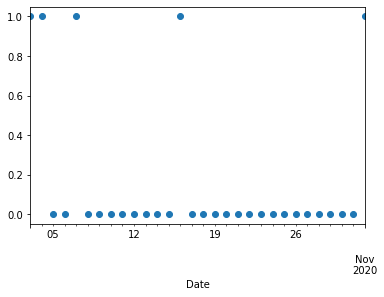

In [19]:
data["num"].resample("d").sum().plot(style="o")